In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from sympy import diff,solve,Eq

<h2 style="background-color:green;">
U-235 Spectra
</h2>

Load predicted antineutrino spectra for U-235 according beta spectra from KI paper [1] and fit on that with chi-squared method. Hence we have spectra function per energy.

In [2]:
KI_235U = pd.read_csv('https://raw.githubusercontent.com/dehpour/Reactor-Antineutrino-Flux-Analysis/main/db/2021Kopeikin_N_nu_E_235U.csv')
E_KI_235U, N_KI_235U, err_KI_235U = KI_235U['E'], KI_235U['N_nu'], KI_235U['err']
#KI_235U.head()

In [3]:
from sympy.abc import a,b,c,d,e,f
chi_sq = []

for i in range (len(N_KI_235U)):
    chi_sq.append(((np.log(N_KI_235U[i]) - (a + b*(E_KI_235U[i]) + c*(E_KI_235U[i])**2 + d*(E_KI_235U[i])**3 + e*(E_KI_235U[i])**4+f*(E_KI_235U[i])**5))/np.log((err_KI_235U[i]*N_KI_235U[i])/100))**2)
    i += 1
chi_sq = sum(chi_sq)

eq1 = Eq(diff(chi_sq,a), 0)
eq2 = Eq(diff(chi_sq,b), 0)
eq3 = Eq(diff(chi_sq,c), 0)
eq4 = Eq(diff(chi_sq,d), 0)
eq5 = Eq(diff(chi_sq,e), 0)
eq6 = Eq(diff(chi_sq,f), 0)
sol = solve((eq1,eq2,eq3,eq4,eq5,eq6), (a, b, c, d, e, f))
a_0_235U, a_1_235U, a_2_235U, a_3_235U, a_4_235U,a_5_235U = np.float(sol[a]), np.float(sol[b]), np.float(sol[c]), np.float(sol[d]), np.float(sol[e]), np.float(sol[f])

Load Daya Bay (DYB) and PROSPECT experimental data from [2, 3]. Note that spectra must per 12 hr per 1 MeV per fission (fission energy equal to 203 MeV), these data per 24 hr (because we want compare with KI results), so we divide by 2.
Another hand PROSPECT data per 200 keV and we must convert to per 1 MeV per fission.

In [4]:
DYB_235U = pd.read_csv('https://raw.githubusercontent.com/dehpour/Reactor-Antineutrino-Flux-Analysis/main/db/2019Adey_N_nu_E_235U.csv')
E_DYB_235U, N_DYB_235U = DYB_235U['E'], DYB_235U['N_nu']/2
#DYB_235U.head()

In [5]:
PROSPECT_235U = pd.read_csv('https://raw.githubusercontent.com/dehpour/Reactor-Antineutrino-Flux-Analysis/main/db/2018Ashenfelter_N_nu_E_235U.csv')
E_PROSPECT_235U, N_PROSPECT_235U = PROSPECT_235U['E'], ((202.36*1000)/200)*PROSPECT_235U['N_nu']*10**-6/2
#PROSPECT_235U.head()

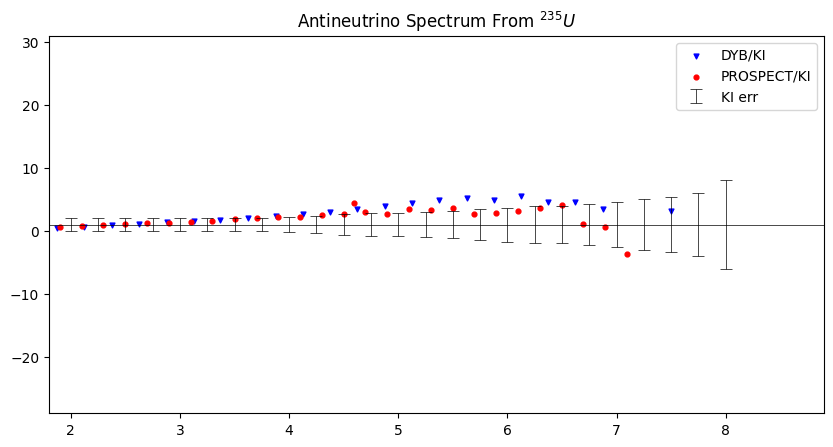

In [6]:
plt.figure(figsize=(10, 5),dpi=100)
plt.xlim(1.8,8.9)
plt.ylim(1-30,1+30)

plt.scatter(E_DYB_235U, (N_DYB_235U)/np.exp(a_0_235U+a_1_235U*E_DYB_235U+a_2_235U*E_DYB_235U**2+a_3_235U*E_DYB_235U**3+a_4_235U*E_DYB_235U**4+a_5_235U*E_DYB_235U**5), label="DYB/KI", c='b', marker='v', s=12)
plt.scatter(E_PROSPECT_235U, (N_PROSPECT_235U)/np.exp(a_0_235U+a_1_235U*E_PROSPECT_235U+a_2_235U*E_PROSPECT_235U**2+a_3_235U*E_PROSPECT_235U**3+a_4_235U*E_PROSPECT_235U**4+a_5_235U*E_PROSPECT_235U**5), label="PROSPECT/KI", c='r', s=12)

plt.errorbar(E_KI_235U, (N_KI_235U/N_KI_235U), yerr=(err_KI_235U), linestyle="None", c='black',capsize=4.5,capthick=0.5,elinewidth=0.5, label="KI err")
plt.axhline(y=1, color='black', linestyle='-',linewidth=0.5)

plt.title('Antineutrino Spectrum From ''$^{235}U $')
plt.legend()
plt.show()

References: <br>
[1]
<a href="https://arxiv.org/pdf/2103.01684.pdf"> Kopeikin, V. et al. (2021). Reevaluating reactor antineutrino spectra with new measurements of the ratio
between 235-U and 239-Pu β spectra.</a><br>
[2]
<a href="https://sci-hub.se/https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.123.111801" target="_blank"> Adey, D., et al. (2019). Extraction of the 235-U and 239-Pu Antineutrino Spectra at Daya Bay.</a><br>
[3]
<a href="https://arxiv.org/pdf/1812.10877.pdf" target="_blank"> Ashenfelter, J., et al. (2018). Measurement of the Antineutrino Spectrum from 235-U Fission at HFIR with PROSPECT</a>